## Tarea Práctica Unidad 1

### Nombre: Sebastian Molina

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
import imblearn
df = pd.read_csv("SDSS-DR14.csv")
df[:10]

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
5,1.237650e+18,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,3.649550e+17,STAR,0.000315,324,51666,594
6,1.237650e+18,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,3.232870e+17,GALAXY,0.100242,287,52023,559
7,1.237650e+18,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,3.722370e+18,STAR,0.000315,3306,54922,515
8,1.237650e+18,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,3.638290e+17,STAR,0.000089,323,51615,595
9,1.237650e+18,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,3.243690e+17,GALAXY,0.040508,288,52000,400


## Analizando el dataset

* Objid= Id del objeto


* ra= Ascensión recta en grados


* dec = Declinación en grados


* u,g,r,i,z = magnitudes de los objetos en el SDSS


* run = Número del escaneo


* rerun= tipo de escaneo (procesamiento)


* camcol = Es la salida de una columna de cámara de CCD  como parte de un run.


* field = Parte del camcol que es procesada por el photo pipeline


* specobjid = Una identificación única de 64 bits codificada en bits utilizada para objetos espectroscópicos ópticos
class = clase (GALAXY, QSO o STAR)


* redshift = Una medida de la velocidad de recesión de una galaxia u otro objeto del cielo.


* plate = Cada exposición espectroscópica emplea una placa metálica circular grande, delgada, que coloca las fibras ópticas a través de agujeros perforados en las ubicaciones de las imágenes en el plano focal del telescopio.


* mjd = Fecha juliana modificada, utilizada para indicar la fecha en que se tomó una determinada pieza de datos SDSS (imagen o espectro).


* fiberid = Cada objeto tiene asignado un ID de fibra correspondiente.

In [2]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


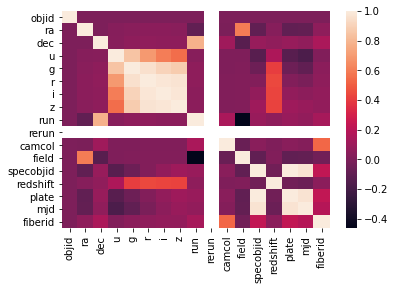

In [4]:
sb.heatmap(df.corr())

In [5]:
## Reemplazamos las clases por valores numericos.
df["class"].replace({'STAR':0, 'GALAXY':1, 'QSO':2}, inplace=True)

In [6]:
#Eliminación de variables que no aportan para esta predicción
df.drop(['objid', 'specobjid', 'mjd','fiberid','rerun','run'],axis=1,inplace=True)

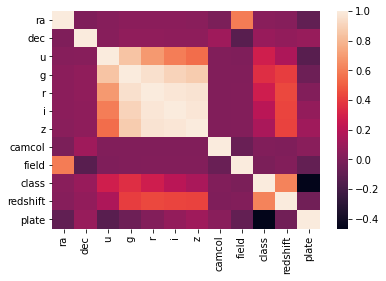

In [7]:
sb.heatmap(df.corr())

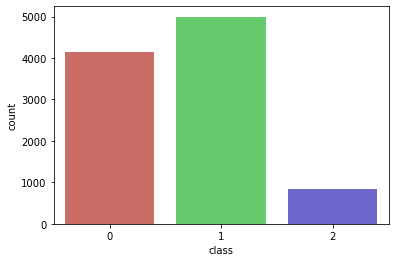

In [8]:
sb.countplot(x='class',data=df, palette='hls')

 Class 0: Estrellas.
 
 Class 1: Galaxia.
 
 Class 2: QSo.
 
 
 Podemos apreciar que hay un desiquilibrio en el dataset.

Para comernzar a equilibrar nuestros datos de entrenamiento necesitamos dividir nuestros datos de entrenamiento y prueba.

In [9]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
 
from collections import Counter

In [46]:
df[:10]

,ra,dec,u,g,r,i,z,camcol,field,class,redshift,plate
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,4,267,0,-0.000009,3306
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,4,267,0,-0.000055,323
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,4,268,1,0.123111,287
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,4,269,0,-0.000111,3306
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,4,269,0,0.000590,3306
5,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,4,269,0,0.000315,324
6,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,4,269,1,0.100242,287
7,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,4,269,0,0.000315,3306
8,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,4,270,0,0.000089,323
9,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,4,270,1,0.040508,288


In [11]:
X = df.iloc[:,[0,1,2,3,4,5,6,7,8,10,11]].values
y = df.iloc[:,9].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [12]:
#Le aplicaremos oversampling a nuestros datos no equilibrados 
#para quitar valores a las clases mayoritarias para así equilibrar a la minoria sin quitar datos.
us = RandomOverSampler(sampling_strategy='minority')
X_train_res, y_train_res = us.fit_sample(X_train, y_train)

In [13]:
print(Counter(y))

Counter({1: 4998, 0: 4152, 2: 850})


In [14]:
print(Counter(y_train_res))

Counter({2: 3545, 1: 3545, 0: 2852})


Como se puede observar los datos ya fueron balanceados, por lo tanto se aplicará una regresión logisitica a continuación.

In [15]:
#Realizaremos la regresión logistica con los datos ya balanceados
#Aumentamos el numero máximo de iteraciones para obtener un mejor rendimiento.
LogReg = LogisticRegression(max_iter = 1000)
LogReg.fit(X_train_res, y_train_res)

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(max_iter=1000)

In [16]:
print("coeficientes del modelo: "+str(LogReg.coef_))
print("intercept: "+str(LogReg.intercept_))

coeficientes del modelo: [[ 8.09481366e-04 -1.13289800e-02  2.09420650e-01 -3.55980719e-01
  -2.23302521e-01  7.07855829e-02  2.87971249e-01 -1.17126670e-03
   4.91356741e-04 -1.02289034e+00  6.75710984e-04]
 [ 5.88172104e-04  8.98863173e-03  1.58699888e+00  3.05639861e-01
  -3.10616409e-01 -6.95183595e-01 -9.63204477e-01 -1.73810661e-01
  -3.46532476e-04 -8.65766459e-01 -8.96203646e-04]
 [-1.39765347e-03  2.34034824e-03 -1.79641953e+00  5.03408577e-02
   5.33918930e-01  6.24398012e-01  6.75233228e-01  1.74981927e-01
  -1.44824264e-04  1.88865680e+00  2.20492662e-04]]
intercept: [ 0.0573698   0.07293908 -0.13030888]


In [50]:
print(LogReg.intercept_, LogReg.coef_)

[ 0.0573698   0.07293908 -0.13030888] [[ 8.09481366e-04 -1.13289800e-02  2.09420650e-01 -3.55980719e-01
  -2.23302521e-01  7.07855829e-02  2.87971249e-01 -1.17126670e-03
   4.91356741e-04 -1.02289034e+00  6.75710984e-04]
 [ 5.88172104e-04  8.98863173e-03  1.58699888e+00  3.05639861e-01
  -3.10616409e-01 -6.95183595e-01 -9.63204477e-01 -1.73810661e-01
  -3.46532476e-04 -8.65766459e-01 -8.96203646e-04]
 [-1.39765347e-03  2.34034824e-03 -1.79641953e+00  5.03408577e-02
   5.33918930e-01  6.24398012e-01  6.75233228e-01  1.74981927e-01
  -1.44824264e-04  1.88865680e+00  2.20492662e-04]]


In [17]:
#Predicciones
y_pred = LogReg.predict(X_test)
y_pred

array([2, 1, 1, ..., 0, 1, 1], dtype=int64)

In [18]:
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[1046,  183,   71],
       [  68, 1370,   15],
       [   4,   15,  228]], dtype=int64)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.80      0.87      1300
           1       0.87      0.94      0.91      1453
           2       0.73      0.92      0.81       247

    accuracy                           0.88      3000
   macro avg       0.85      0.89      0.86      3000
weighted avg       0.89      0.88      0.88      3000



# Ahora utilizaremos regresión lineal

In [20]:
#Utilizaremos el método de optimización Ordinary Least Squares (OLS)
import statsmodels.api as sm
est = sm.OLS(y_train_res, X_train_res).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.918
Model:                            OLS   Adj. R-squared (uncentered):              0.918
Method:                 Least Squares   F-statistic:                          1.011e+04
Date:                Sat, 30 May 2020   Prob (F-statistic):                        0.00
Time:                        16:44:24   Log-Likelihood:                         -4547.3
No. Observations:                9942   AIC:                                      9117.
Df Residuals:                    9931   BIC:                                      9196.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [21]:
#Utilizaremos una función que será nuestro función y teniendo los coeficientes de sus parametrox "Xi"
def predict_ast(ra,dec,u,g,r,i,z,camcol,field,redshift,plate):
    return  -1.427e-06 * ra + 0.0017 * dec  + u * -0.7844 + g * 1.3934 + 0.2647 * r + 0.0185 * i + z * -0.8272 + camcol *-9.374e-05 + field *3.043e-05+ 0.5418 * redshift + -9.037e-05 * plate

In [45]:
#Podemos analizar esta función por ejemplo poner valores de la clase uno dos y tres para ver si realmente nos clasifica en su respectica clase
#Clase 0
predict_ast(184.466853,0.111965,19.39320,18.48274,18.16551,18.05122,18.04328,4,273,-0.000270,324)

0.7372140573007684

In [44]:
#Clase 1
predict_ast(183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,4,268,0.123111,287)

1.2363527026446115

In [42]:
#Clase 2
predict_ast(184.350647,0.207230,18.73832,18.60962,18.39696,18.31174,17.97663,4,272,0.271937,287)

1.699870965226728

# Ahora utilizaremos modelo de clasificación de tipo arboles de decisión

In [23]:
from sklearn import tree
#Entrenamiento
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_res,y_train_res)

In [24]:
#Predicciones
y_pred = clf.predict(X_test)
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
#Print de la matriz de confusión
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[1290    8    2]
 [   2 1439   12]
 [   0   30  217]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1300
           1       0.97      0.99      0.98      1453
           2       0.94      0.88      0.91       247

    accuracy                           0.98      3000
   macro avg       0.97      0.95      0.96      3000
weighted avg       0.98      0.98      0.98      3000



In [34]:
import sklearn
sklearn.show_versions()


System:
    python: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
executable: E:\Anaconda3\python.exe
   machine: Windows-10-10.0.18362-SP0

Python dependencies:
          pip: 20.0.2
   setuptools: 45.2.0.post20200210
      sklearn: 0.23.1
        numpy: 1.18.1
        scipy: 1.4.1
       Cython: 0.29.15
       pandas: 1.0.1
   matplotlib: 3.2.1
       joblib: 0.14.1
threadpoolctl: 2.0.0

Built with OpenMP: True


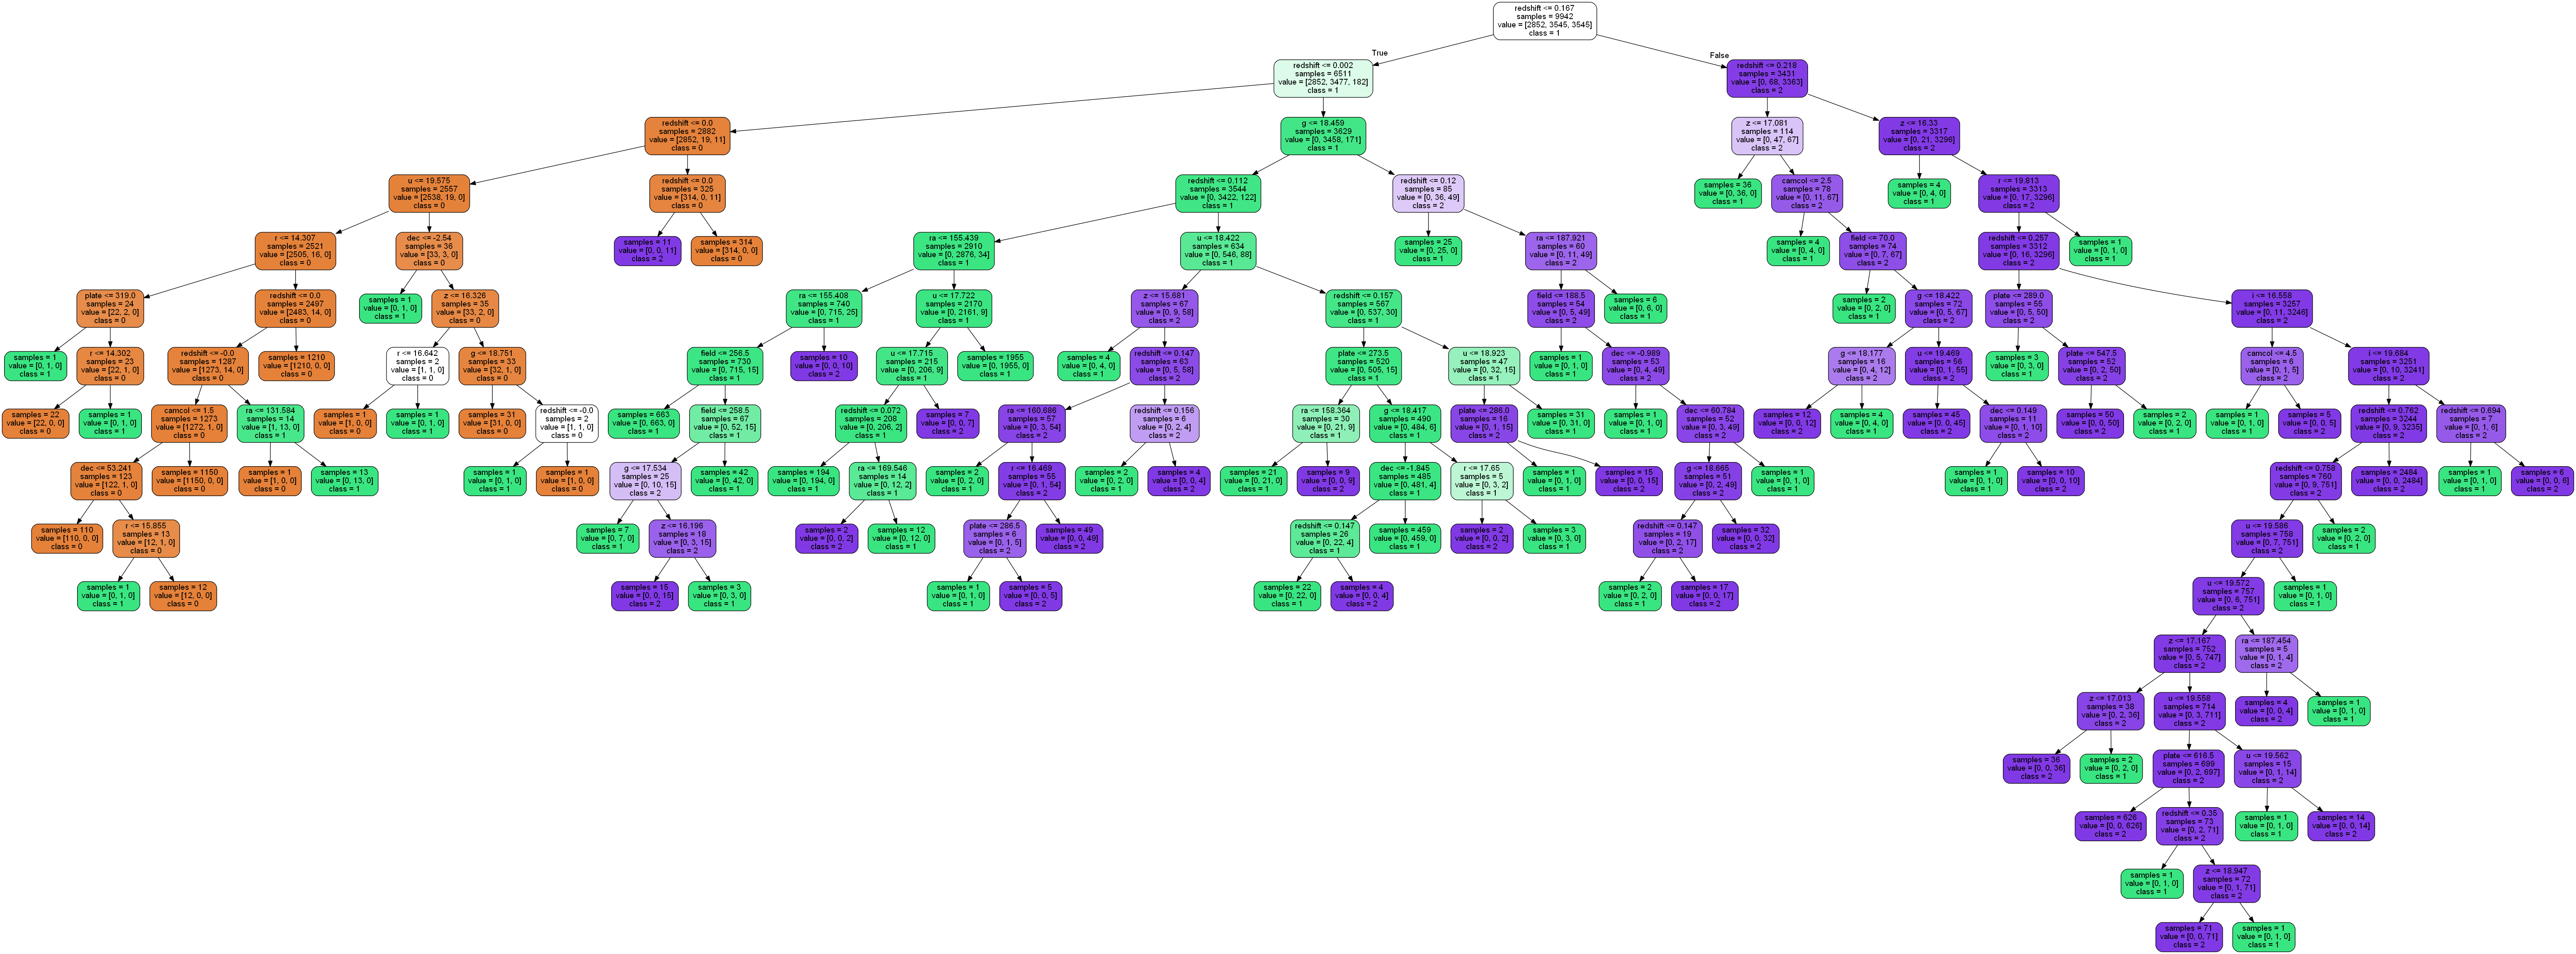

In [36]:
from sklearn.externals.six import StringIO
import pydot #sudo apt install python3-pydot graphviz

dot_data = StringIO()

features=['ra','dec','u','g','r','i','z','camcol','field','redshift','plate']
classes=['0','1','2']
tree.export_graphviz(clf,out_file=dot_data,feature_names=features,class_names=classes, filled=True, 
                     rounded=True, impurity=False)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_png('modelo.png')
from IPython.display import Image
Image("modelo.png")

# Rendimiento , Ventajas y Desventajas.

### Regresión logística:

#### Clase 0 (Galaxia): Esta clase tiene un 94% de acertar la predicción de galaxia y de todas las clases la reconocio un 80%
#### Clase 1 (Estrella): Esta clase tiene un 87% de acertar la predicción de estrella y de todas las clases la reconocio un 94%
#### Clase 2 (Quars): Esta clase tiene un 73% de acertar la predicción de Quars y de todas las clases la reconocio un 92% 

### Arbol de desición:

#### Clase 0 (Galaxia): Esta clase tiene un 100% de acertar la predicción de galaxia y de todas las clases la reconocio un 99%
#### Clase 1 (Estrella): Esta clase tiene un 97% de acertar la predicción de estrella y de todas las clases la reconocio un 99% 
#### Clase 2 (Quars):  Esta clase tiene un 94% de acertar la predicción de Quars y de todas las clases la reconocio un 88% 

### Regresión lineal:

#### Podemos ver que las clases 0 y 1 las predice de una forma muy buena, aproximando sus resultados a la clase correspondiente, pero viendo la clase 2, podemos ver que la predice de forma muy poco precisa tienendo por ejemplo una aproximación de 1.699870965226728 , cuando esta debería ser lo más aproximado a 2.



Podemos apreciar gracias a la matriz de confusión que el modelo de tipo de arbol de decisión contiene una precision mayor que la regresión logistica eso quiere decir que la fracción de todas las instancias relvantes divididos entre las instancias obtenidas son mayores, además tiene un recall mayor, eso quiere decir que la fracción de instancias relvantes sobre la cantidad total de instancias relevantes son mayores igualmente. 

Gracias a esto podemos decir que el arbol de desición tiene una mejor predicción de las clases, pero esto también significa que es un modelo que se especifica mucho en este tipo de predicción y deja de ser tan general, aunque estos arboles son fáciles de comprender y entender, además de que no requiere una preparación de los datos demasiado exigente estos aprendices de árbol de decisión tienden al sobreentrenamiento, especialmente cuando el número de características predictivas es alto y son inestables.


En cambio hablando de la regresión logística podemos decir que entre sus ventajas se puede destacar su simplicidad y que sus resultados son fácilmente interpretables. Por otro lado, entre sus desventajas se puede destacar que no funciona bien en problemas que no son linealmente separables. Contiene la imposibilidad de resolver directamente problemas no lineales, por lo tanto si este es el problema, se tendrá que utilizar otro modelo por ejemplo el modelo de arbol de desición. La regresión logística contiene problemas de clasificación con múltiples clases.


De esto podemos decir que dependerá del analista al elegir algún tipo de modelos, ya que no varían de manera alta sus predicciones, pero dependerá del problema a analizár la elección de de estos dos modelos.

Hablando de la regresión lineal podemos decir que es fácil de entender y explicar, lo que puede ser muy valioso para las decisiones de negocios, es rápido de modelar y es particularmente útil cuando la relación a modelar no es extremadamente compleja y no tiene mucha información y es menos propenso al sobreajuste, aunque viendo las desventajas podemos decir que no se puede modelar relaciones complejas, no se pueden capturar relaciones no lineales sin transformar la entrada, por lo que tienes que trabajar duro para que se ajuste a funciones no lineales y que no se pueden capturar relaciones no lineales sin transformar la entrada, por lo que tienes que trabajar duro para que se ajuste a funciones no lineales.

Por lo tanto si comparamos la regresión lineal con la regresión logística la diferencia será del tipo de problema que intenemos desarrollar (si son problemas no lineales).

Si lo comparamos con el modelo de arbol de desición podemos decir que la regresión lineal es el método más usado en estadística para predecir valores de variables continuas debido a su fácil interpretación, pero en muchas situaciones los supuestos para aplicar el modelo no se cumplen y algunos usuarios tienden a forzarlos llevando a conclusiones erróneas. 

Los árboles de desición son una alternativa de regresión que no requiere supuestos sobre los datos a analizar y es un método de fácil interpretación de los resultados. En este trabajo se comparan a nivel predictivo la regresión lineal con los arboles de desición mediante simulación. En general, se encontró que cuando se ajusta el modelo de regresión lineal correcto a los datos, el error de predicción de regresión lineal siempre es menor que el de los arboles de desición.

De lo anterior se puede concluir que, el modelo de arbol de desición es una alternativa que prueba ser una buena opción cuando el usuario desconoce la forma funcional verdadera del modelo, lo cual es común en investigaciones reales. Si el analista está seguro de cuál es la forma funcional de su modelo, entonces el modelo de arbol de desición no es una opción viable.



# Análisis de carácteristicas mas relevantes

El modelo de regresión lineal nos da los pesos de las carácteristicas mas relevantes, las cuales en sus resultados podemos observar de mayor a menor peso son las siguientes:
* Redshift = Una medida de la velocidad de recesión de una galaxia u otro objeto del cielo.
* g,r = magnitudes de los objetos en el SDSS

El modelo de árbol de decisión podemos observar cuales son las carácteristicas mas relevante mirando la raíz del de arbol y de sus primeras hojas, por lo que podemos observar que las más relevantes son:
* Redshift = Una medida de la velocidad de recesión de una galaxia u otro objeto del cielo.
* U,g,z = magnitudes de los objetos en el SDSS

El modelo de regresión logística podemos observar cuales son las carácteristicas mas relevante mirando el peso de los coeficientes, por lo que podemos observar que las más relevantes son:

* Redshift = Una medida de la velocidad de recesión de una galaxia u otro objeto del cielo. ( Valor: 1.88865680e+00)
* U = magnitudes de los objetos en el SDSS (Valor: -1.79641953e+00)


Por lo tanto como conclusión las carácteristicas mas relevantes para poder predecir si es galaxia, estrella o quars son las carácteristicas "Redshift" y "U".